# Forças Tectônicas

O movimento das placas tectônicas é causado por forças, em sua maioria, gravitacionais. As principais forças que causam esse movimento são _Ridge Push_ e _Slab Pull_. Neste notebook iremos utilizar os conceitos e bibliotecas apresentados nos notebooks introdutórios para visualizar melhor as fórmulas e fatores determinantes de ambas forças. 

## Ridge Push

A força _Ridge Push_ é uma força gravitacional que atua entre a dorsal meso-oceânica e a planície abissal, cuja ordem de grandeza é de 10^12 Nm^-1. A fórmula utilizada para calcularmos a intensidade da força _Ridge Push_ é:

$$F_{rp} = g . e . (p_{m} - p_{w}) . \left(\frac{L}{e} + \frac{e}{2}\right)$$ 

Em que:
- g é a aceleração da gravidade, para a qual usaremos 10m/s^2
- e é a elevação da dorsal meso-oceânica
- pm é a densidade da astenosfera (em kg . m ^ -3)
- pw é a densidade da água do mar (em kg . m ^ -3)
- L é a espessura da placa 

Nesta fórmula, no código abaixo, tomaremos apenas _L_ e _e_ como variáveis, pois seus valores costumam variar mais, mas você pode mudar todos os valores descritos na fórmula.

In [1]:
# função para calculo de força ridge push:
def ridge_push(L, e): 
    # aqui definimos os parâmetros da função
    g = 10 
    pm = 3330 
    pw = 1030 
    
    Frp = g*int(e)*(pm - pw)*((int(L)/3)+(int(e)/2)) # esta é a nossa fórmula
    
    return "{:.2E}".format(Frp) # retorna o resultado em notação científica

In [2]:
forcaRidgePush = ridge_push(85000, 5000) # nos parentesis colocamos os valores de L e de e, respectivamente

print('Frp = ', forcaRidgePush)

Frp =  3.55E+12


#### Visualização Gráfica

Agora vamos variar os valores de _L_ e de _e_, respectivamente, para que possamos plotar no gráfico a intensidade da força _Ridge Push_ em relação a cada um, e assim observar melhor como seria a força nos casos em que tivéssemos uma placa mais espessa e como seria quando a placa fosse menos espessa, bem como a maneira em que a força se alteraria conforme tivéssemos uma elevação maior ou menor da dorsal meso-oceânica.

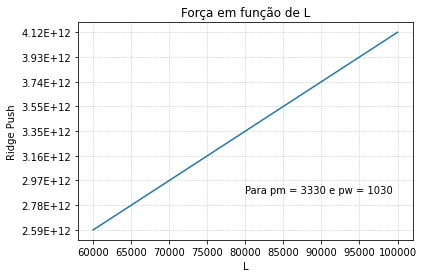

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# aqui nosso x será L
# utilizamos a função arrange para criar um intervalo de valores para L
# estes valores irão começar em 60000m e terminar em 101000m, com espaçamento uniforme de 5000m
x_axis_L = np.arange(60000, 101000, 5000) 

# nosso y será a força Ridge Push
y_axis_L = []

# um laço que calcula o valor de y para cada valor em x
for L in x_axis_L:
    y_axis_L.append(ridge_push(L, 5000))
    
# plotando o gráfico:
plt.plot(x_axis_L, y_axis_L)
plt.title("Força em função de L")
plt.xlabel("L")
plt.ylabel("Ridge Push")
plt.grid(linestyle=':', linewidth=0.7)
plt.text(80000, 1.5, "Para pm = 3330 e pw = 1030")
plt.show()

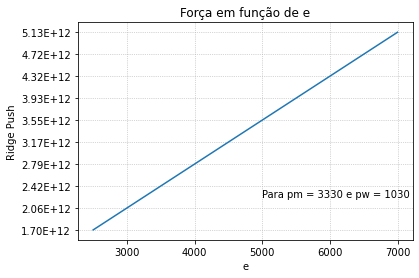

In [4]:
# aqui nosso x será e
# utilizamos a função arrange para criar um intervalo de valores para e
# estes valores irão começar em 2500m e terminar em 7500m, com espaçamento uniforme de 500m
x_axis_e = np.arange(2500, 7500, 500)

# nosso y será a força Ridge Push
y_axis_e = []

# um laço que calcula o valor de y para cada valor em x:
for e in x_axis_e:
    y_axis_e.append(ridge_push(85000, e))
    
# plotando o gráfico:
plt.plot(x_axis_e, y_axis_e)
plt.title("Força em função de e")
plt.xlabel("e")
plt.ylabel("Ridge Push")
plt.grid(linestyle=':', linewidth=0.7)
plt.text(5000, 1.5, "Para pm = 3330 e pw = 1030")
plt.show()

## Slab Pull

A força _Slab Pull_ ocorre devido ao movimento de "puxar" que a placa subductada faz sobre a placa superior a ela. Esta força é de ordem de grandeza de 10^13 Nm^-1, e possui duas fórmulas, uma mais curta, e uma mais longa e mais precisa. São elas:

$$ F_{sp} = z_{m} . (z_{l} . \Delta p). g  $$

Em que:
- zm é a profundidade da parte mais profunda da placa subductada
- zl é a espessura da placa
- Δp é pm - pw
- g é a aceleração da gravidade, para a qual usaremos 10m/s^2

E $$ F_{sp} = \frac{8 . g . \alpha . p_{m} . T_{a} . L^{2} . Re}{\pi^{4}} . (e^{\textstyle - \frac{\pi^{2} . z}{2 . Re . L}} - e^{\textstyle - \frac{\pi^{2} . d}{2 . Re . L}}) $$

com $$Re = \frac{p_{m} . C_{p} . v . L}{2 . k}$$

Em que:
- g é a aceleração da gravidade, para a qual usaremos 10m/s^2
- Re é o número de Reynolds (a relação entre covecção e condução térmica)
- Ta é a temperatura da astenosfera
- α é o coeficiente de expansão térmica (em K^-1)
- pm é a densidade da astenosfera (em kg . m ^ -3)
- z é a profundidade abaixo da parte mais profunda da placa subductada
- L é a espessura da placa
- d é a profundidade do manto superior 
- Cp é o calor específico 
- v é a velocidade de subducção da placa

Nestas fórmulas, no código abaixo, tomaremos apenas zm, zl e Δp como variáveis na primeira, v e L como variáveis na de Reynolds, e L, z, d e v como variáveis na segunda, pois seus valores costumam variar mais, mas você pode mudar todos os valores descritos nas fórmulas.

### Fórmula mais curta

In [5]:
# função curta para calculo de força slab pull:
def slab_pull_curto(zm, zl, delta_p):
    # aqui definimos os parâmetros da função
    g = 10 
    
    Fspc = int(zm)*int(zl)*delta_p*g # esta é a nossa fórmula
    
    return "{:.2E}".format(Fspc)  # retorna o resultado em notação científica

In [6]:
# nos parentesis abaixo colocamos os valores de zm, zl e de delta_p, respectivamente
forcaSlabPull = slab_pull_curto(660000, 100000, 60)

print('Fsp (Fórmula curta) = ', forcaSlabPull)

Fsp (Fórmula curta) =  3.96E+13


#### Visualização Gráfica

Agora vamos variar os valores de _zm_, de _zl_ e de _delta p_, respectivamente, para que possamos plotar no gráfico a intensidade da força _Slab Pull_ em relação a cada um, e assim observar melhor como a alteração de cada um destes valores afetaria o módulo da força.

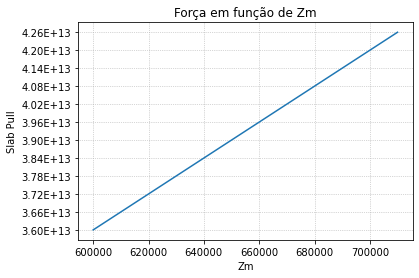

In [7]:
# aqui nosso x será zm
# utilizamos a função arrange para criar um intervalo de valores para zm
# estes valores irão começar em 600000m e terminar em 720000m, com espaçamento uniforme de 10000m
x_axis_zm = np.arange(600000, 720000, 10000)

# nosso y será a força Slab Pull
y_axis_zm = []

# um laço que calcula o valor de y para cada valor em x
for zm in x_axis_zm:
    y_axis_zm.append(slab_pull_curto(zm, 100000, 60))

# plotando o gráfico:
plt.plot(x_axis_zm, y_axis_zm)
plt.title("Força em função de Zm")
plt.xlabel("Zm")
plt.ylabel("Slab Pull")
plt.grid(linestyle=':', linewidth=0.7)
plt.show()

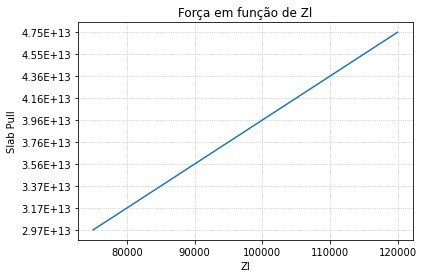

In [8]:
# aqui nosso x será zl
# utilizamos a função arrange para criar um intervalo de valores para zl
# estes valores irão começar em 75000m e terminar em 125000m, com espaçamento uniforme de 5000m
x_axis_zl = np.arange(75000, 125000, 5000)

# nosso y será a força Slab Pull
y_axis_zl = []

# um laço que calcula o valor de y para cada valor em x
for zl in x_axis_zl:
    y_axis_zl.append(slab_pull_curto(660000, zl, 60))
    
plt.plot(x_axis_zl, y_axis_zl)
plt.title("Força em função de Zl")
plt.xlabel("Zl")
plt.ylabel("Slab Pull")
plt.grid(linestyle=':', linewidth=0.7)
plt.show()

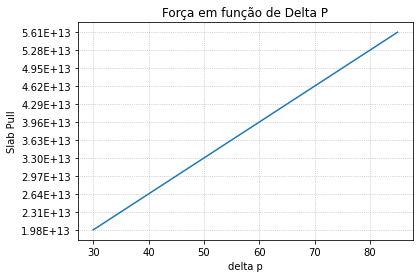

In [9]:
# aqui nosso x será delta p (dp)
# utilizamos a função arrange para criar um intervalo de valores para delta p
# estes valores irão começar em 30kg m^-3 e terminar em 90kg m^-3 , com espaçamento uniforme de 5kg m^-3 
x_axis_dp = np.arange(30, 90, 5)

# nosso y será a força Slab Pull
y_axis_dp = []

# um laço que calcula o valor de y para cada valor em x
for dp in x_axis_dp:
    y_axis_dp.append(slab_pull_curto(660000, 100000, dp))
    
plt.plot(x_axis_dp, y_axis_dp)
plt.title("Força em função de Delta P")
plt.xlabel("delta p")
plt.ylabel("Slab Pull")
plt.grid(linestyle=':', linewidth=0.7)
plt.show()

### Fórmula mais longa

In [10]:
# função longa para calculo de força slab pull:
def slab_pull(L, z, v):
    # aqui definimos os parâmetros da função
    g = 9.81
    alpha = 3.0E-5
    pm = 3.3E+3
    Ta = 1623.15
    d = 660000.0 - L
    cp = 1178.3 
    k  = 2.0
    Re = pm*cp*v*L/2*k  # colocamos a fórmula do número de Reynolds

    # temos a seguir a fórmula completa do Slab Pull:
    Fsp = 8 * g * alpha * pm * Ta * Re * pow(L, 2) / np.pi ** 4 * (np.exp(-(np.pi ** 2) * z / (2 * Re * L)) - np.exp(-(np.pi ** 2) * d / (2 * Re * L)))
    
    return "{:.2E}".format(Fsp)  # retorna o resultado em notação científica

In [11]:
# nos parentesis abaixo colocamos os valores de L, z e v, respectivamente
forcaSlabPull = slab_pull(100000, 85000, 3.17E-9)

print('Fsp = ', forcaSlabPull)

Fsp =  3.00E+13


#### Visualização Gráfica

Agora vamos variar os valores de _L_, de _z_, de _d_ e de _v_, respectivamente, para que possamos plotar no gráfico a intensidade da força Slab Pull em relação a cada um, e assim observar melhor como a alteração de cada um destes valores afetaria o módulo da força.

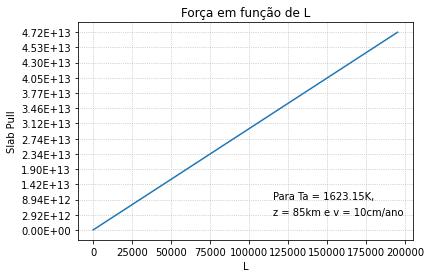

In [12]:
# aqui nosso x será L
# utilizamos a função arrange para criar um intervalo de valores para L
# estes valores irão começar em 10m e terminar em 200000m, com espaçamento uniforme de 15000m
x_axis_L = np.arange(1E+1, 2E+5, 1.5E+4)

# nosso y será a força Slab Pull
y_axis_L = []

for L in x_axis_L:
    y_axis_L.append(slab_pull(L, 8.5E+4, 3.17E-9))

# plotando o gráfico:
plt.plot(x_axis_L, y_axis_L)
plt.title("Força em função de L")
plt.xlabel("L")
plt.ylabel("Slab Pull")
plt.grid(linestyle=':', linewidth=0.7)
plt.text(115000, 2, "Para Ta = 1623.15K,")
plt.text(115000, 1, "z = 85km e v = 10cm/ano")
plt.show()

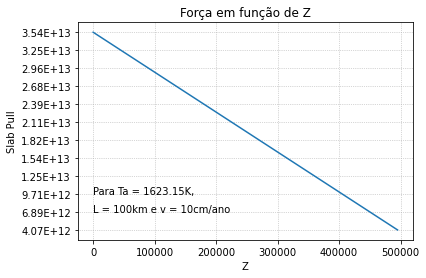

In [13]:
# aqui nosso x será z
# utilizamos a função arrange para criar um intervalo de valores para z
# estes valores irão começar em 10m e terminar em 500000m, com espaçamento uniforme de 45000m
x_axis_z = np.arange(1E+1, 5E+5, 4.5E+4)

# nosso y será a força Slab Pull
y_axis_z = []

for z in x_axis_z:
    y_axis_z.append(slab_pull(1E+5, z, 3.17E-9))

# plotando o gráfico:
plt.plot(x_axis_z, y_axis_z)
plt.gca().invert_yaxis()
plt.title("Força em função de Z")
plt.xlabel("Z")
plt.ylabel("Slab Pull")
plt.grid(linestyle=':', linewidth=0.7)
plt.text(0, 9, "Para Ta = 1623.15K,")
plt.text(0, 10, "L = 100km e v = 10cm/ano")
plt.show()

['2.05E+13', '2.37E+13', '2.71E+13', '3.00E+13']


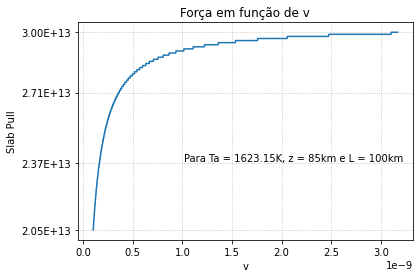

In [30]:
# aqui nosso x será v
# utilizamos a função arrange para criar um intervalo de valores para v
# estes valores irão começar em 0,031536cm/ano e terminar em 10cm/ano, com espaçamento uniforme de 0.00031536cm/ano
x_axis_v = np.arange(1E-10, 3.17E-9 , 1E-12)

# nosso y será a força Slab Pull
y_axis_v = []
y_axis_ticks = []

for v in x_axis_v:
    y_axis_v.append(slab_pull(1E+5, 8.5E+4, v))

# escolhemos os valores de y que queremos que apareçam no gráfico, para que ele não fique muito poluído
y_axis_ticks.append(y_axis_v[0])
y_axis_ticks.append(y_axis_v[len(y_axis_v)//50])
y_axis_ticks.append(y_axis_v[len(y_axis_v)//12])
y_axis_ticks.append(y_axis_v[len(y_axis_v)-1])

print(y_axis_ticks)

# plotando o gráfico:
plt.plot(x_axis_v, y_axis_v)
plt.yticks(y_axis_ticks, y_axis_ticks)
plt.title("Força em função de v")
plt.xlabel("v")
plt.ylabel("Slab Pull")
plt.grid(linestyle=':', linewidth=0.7)
plt.text(1.02E-9, 33, "Para Ta = 1623.15K, z = 85km e L = 100km")
plt.show()